In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# path = "/media/dan/Data/git/network_miner/temp/data/064_000500_0000.5.hdf5"
# path = "F:\\git\\network_miner\\temp\\data\\064_000500_0000.5.hdf5"
path = "/media/dan/Data/git/eeg_prep/processed_files/011_000500_000500.hdf5"
with h5py.File(path, "r") as f:
    # list keys in f['metadata']["patient_info"]
    # print(list(f['metadata']["patient_info"].keys()))
    
    # print(f['data']['A_mats'].shape)
    A_mats = f['data']['A_mats'][:]
    A_mats_mask = f['data']['A_mask'][:]
    soz = f['metadata']["patient_info"]['soz'][:].astype(int)
    miccai = f['metadata']["patient_info"]['miccai'][:]
    miccai = [name.decode('utf-8') for name in miccai]
    chnames = f['metadata']['channels'][:]
    # bytestring to string
    chnames = [name.decode('utf-8') for name in chnames]
    chnames = np.array(chnames)
    x = f['metadata']["patient_info"]['x'][:]
    y = f['metadata']["patient_info"]['y'][:]
    z = f['metadata']["patient_info"]['z'][:]


In [67]:
s = set(miccai)
len(s)

15

In [53]:
xyz = np.stack((x, y, z), axis=-1)
x_all = x - x.reshape(-1, 1)
y_all = y - y.reshape(-1, 1)
z_all = z - z.reshape(-1, 1)
xyz_all = np.stack((x_all, y_all, z_all), axis=-1)

In [54]:
xyz_all[0,:4]

array([[  0. ,   0. ,   0. ],
       [ -3.5,   0.5,   0. ],
       [ -7.5,   1. ,   0. ],
       [-11.5,   1.5,   0. ]])

In [55]:
A_mean = np.mean(np.abs(A_mats), axis=-1, keepdims=True)

In [48]:
xyz_all.shape

(192, 192, 3)

In [56]:
# data = np.concatenate((xyz_all, A_mean), axis=-1)
data = xyz_all
# reshaped_array = data.reshape(-1, 4)
reshaped_array = data.reshape(-1, 3)
reshaped_array.shape

(10000, 3)

In [58]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(reshaped_array)


In [60]:
# 2d soz summary
soz_2d = soz + soz.reshape(-1, 1)
soz_2d = soz_2d.reshape(-1)


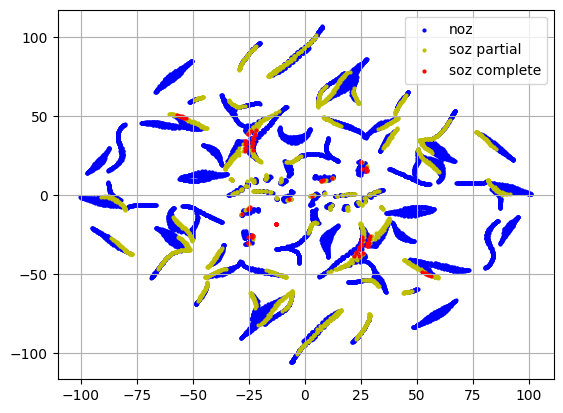

In [61]:
# separate non-soz = 0, soz-partial =1, soz-complete = 2
noz = soz_2d == 0
soz_partial = soz_2d == 1
soz_complete = soz_2d == 2
s = 4
plt.scatter(data_tsne[noz, 0], data_tsne[noz, 1], s= 4, c='b', label='noz')
plt.scatter(data_tsne[soz_partial, 0], data_tsne[soz_partial, 1], s=4, c='y', label='soz partial')
plt.scatter(data_tsne[soz_complete, 0], data_tsne[soz_complete, 1], s=4, c='r', label='soz complete')
plt.grid()
plt.legend()



In [ ]:

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=3)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()